In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
%matplotlib inline
import torch   
import torch.nn as nn
from utils.data_utils import getDataProviders
from utils.arg_extractor import get_args
from utils.experiment_builder import ExperimentBuilder
from utils.utils import load_net
import numpy as np
import pandas as pd

In [10]:
model_path = '../experiments_results/densenet121_cifar10/saved_models/train_model_best_readable'
model_dict = torch.load(model_path, map_location='cpu')
net = load_net('densenet121', model_path, 10)

nets = {
        'resnet56_cifar10': 'cifar10',
        'resnet56_cifar10_fgsm': 'cifar10',
#         'resnet56_cifar10_pgd': 'cifar10',
        'resnet56_cifar100': 'cifar100',
        'resnet56_cifar100_fgsm': 'cifar100',
#         'resnet56_cifar100_pgd': 'cifar100',
#         'resnet56_cifar100_to_cifar10': 'cifar10',

        'densenet121_cifar10': 'cifar10',
        'densenet121_cifar10_fgsm': 'cifar10',
#         'densenet121_cifar10_pgd': 'cifar10',
        'densenet121_cifar100': 'cifar100',
        'densenet121_cifar100_fgsm': 'cifar100',
#         'densenet121_cifar100_pgd': 'cifar100'
}


models = {}
for net,dataset in nets.items():
    model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
    model_dict = torch.load(model_path, map_location='cpu')
    architecture= net.split('_')[0]
    load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
    models[net] = load_network  

train_summary = {}
validation_summary = {}
test_summary = {}

models = {}
for net,dataset in nets.items():
    stats_path =  '../experiments_results/'+net+'/result_outputs'
    
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    train_summary[net] = data_train['train_loss']
    validation_summary[net] = data_train['val_acc']
    data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_summary[net] = data_test['test_acc']
    


0.9428


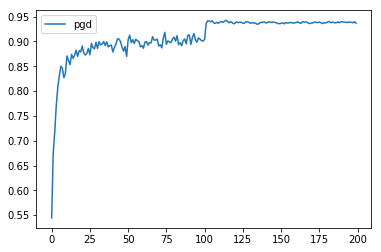

In [11]:
# validation_summary['resnet56_cifar10_pgd'][:200].plot(label = 'pgd')
validation_summary['densenet121_cifar10'][:200].plot(label = 'pgd')
print(max(validation_summary['densenet121_cifar10']))
# validation_summary['resnet56_cifar10_pgd'][:200].plot(label='pgd')
plt.legend()

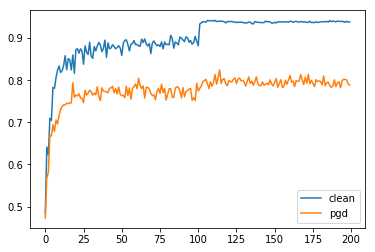

In [13]:
validation_summary['resnet56_cifar10'][:200].plot(label = 'clean')
validation_summary['resnet56_cifar10_fgsm'][:200].plot(label='pgd')
plt.legend()

## Adversarial plots

In [19]:
model_path = '../experiments_results/resnet56_cifar10/saved_models/train_model_best_readable'
model_dict = torch.load(model_path, map_location='cpu')
net = load_net('resnet56', model_path, 10)
nets = {
#         'resnet56_cifar10': 'cifar10',
        'resnet56_cifar10_fgsm': 'cifar10',
#         'resnet56_cifar10_pgd': 'cifar10',
#         'resnet56_cifar100': 'cifar100',
        'resnet56_cifar100_fgsm': 'cifar100',
#         'resnet56_cifar100_pgd': 'cifar100',
#         'resnet56_cifar100_to_cifar10': 'cifar10',

#         'densenet121_cifar10': 'cifar10',
        'densenet121_cifar10_fgsm': 'cifar10',
#         'densenet121_cifar10_pgd': 'cifar10',
#         'densenet121_cifar100': 'cifar100',
        'densenet121_cifar100_fgsm': 'cifar100',
#         'densenet121_cifar100_pgd': 'cifar100'
}


models = {}
for net,dataset in nets.items():
    model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
    model_dict = torch.load(model_path, map_location='cpu')
    architecture= net.split('_')[0]
    load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
    models[net] = load_network  

train_summary = {}
validation_summary = {}
test_summary = {}

models = {}
for net,dataset in nets.items():
    stats_path =  '../experiments_results/'+net+'/result_outputs'
    
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    train_summary[net] = data_train['adv_train_loss']
    validation_summary[net] = data_train['adv_val_acc']
    data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_summary[net] = data_test['test_acc']
    

In [16]:
# validation_summary['resnet56_cifar10_fgsm'].plot(label = 'fgsm')
print(np.max(validation_summary['densenet121_cifar10']))
# plt.legend()

KeyError: 'densenet121_cifar10'

# Cifar10 Baselines

    

'cifar10'

# Cifar 100 Baselines

# Adversarial Trainined Testing

In [40]:
import json 
models = {}

nets = {
#         'resnet56_cifar10': 'cifar10',
        'resnet56_cifar10_fgsm': 'cifar10',
#         'resnet56_cifar10_pgd': 'cifar10',
#         'resnet56_cifar100': 'cifar100',
#         'resnet56_cifar100_fgsm': 'cifar100',
#         'resnet56_cifar100_pgd': 'cifar100',
#         'resnet56_cifar100_to_cifar10': 'cifar10',

#         'densenet121_cifar10': 'cifar10',
        'densenet121_cifar10_fgsm': 'cifar10',
#         'densenet121_cifar10_pgd': 'cifar10',
#         'densenet121_cifar100': 'cifar100',
#         'densenet121_cifar100_fgsm': 'cifar100',
#         'densenet121_cifar100_pgd': 'cifar100'
        'transfer_densenet121_nat_fgsm' : 'cifar10',

        'transfer_densenet121_fgsm_fgsm' : 'cifar10',
#         'transfer_densenet121_fgsm_nat': 'cifar10',
#         'transfer_densenet121_nat_nat':'cifar10', 
#         'transfer_densenet121_nat_nat_all_layers': 'cifar10',
        'transfer_resnet56_fgsm_fgsm': 'cifar10',
        'transfer_resnet56_nat_fgsm': 'cifar10',
#         'transfer_resnet56_fgsm_nat': 'cifar10',
#         'transfer_resnet56_nat_nat': 'cifar10',
#         'transfer_resnet56_nat_nat_all_layers': 'cifar10',
}

train_summary = {}
validation_summary = {}
test_summary = {}

for net,dataset in nets.items():
    model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
    model_dict = torch.load(model_path, map_location='cpu')
    splited = net.split('_')
#     print(splited)
    if splited[0] == 'transfer':
        architecture = splited[1]
    else:
        architecture = splited[0]
    load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
    models[net] = load_network  


for net,dataset in nets.items():
    stats_path =  '../experiments_results/'+net+'/result_outputs'

    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    train_summary[net] = data_train['adv_train_loss']
    validation_summary[net] = data_train['clean_val_acc']
    data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_summary[net] = data_test['test_acc']
    print(net,test_summary[net])

        

    
    
    
    
    
    
    

resnet56_cifar10_fgsm 0    0.8861
Name: test_acc, dtype: float64
densenet121_cifar10_fgsm 0    0.9098
Name: test_acc, dtype: float64
transfer_densenet121_nat_fgsm 0    0.871
Name: test_acc, dtype: float64
transfer_densenet121_fgsm_fgsm 0    0.859
Name: test_acc, dtype: float64
transfer_resnet56_fgsm_fgsm 0    0.8642
Name: test_acc, dtype: float64
transfer_resnet56_nat_fgsm 0    0.8977
Name: test_acc, dtype: float64


0.8792
0.8656


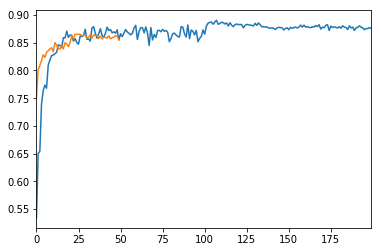

In [42]:
validation_summary['resnet56_cifar10_fgsm'].plot(label = 'fgsm')
validation_summary['transfer_resnet56_fgsm_fgsm'].plot(label = 'fgsm')
print(np.max(validation_summary['resnet56_cifar10_fgsm'][:50]))
print(np.max(validation_summary['transfer_resnet56_fgsm_fgsm'][:50]))


In [ ]:
for 